In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

np.random.seed(0)  # for reproducibility

In [2]:
def init_params(x):    
    """Initialize the parameters for the GMM
    """    
    # Randomly initialize the means to points from the dataset
    mean1, mean2 = np.random.choice(x, 2, replace=False)
    
    # Initialize the standard deviations to 1
    std1, std2 = 1, 1
    
    # Initialize the mixing weights uniformly
    w1, w2 = 0.5, 0.5
    
    return mean1, mean2, std1, std2, w1, w2

In [3]:
def e_step(x, mean1, std1, mean2, std2, w1, w2):
    """E-Step: Compute the responsibilities
    """    
    # Compute the densities of the points under the two normal distributions  
    prob1 = norm(mean1, std1).pdf(x) * w1
    prob2 = norm(mean2, std2).pdf(x) * w2
    
    # Normalize the probabilities
    prob_sum = prob1 + prob2     
    
    prob1 /= prob_sum
    prob2 /= prob_sum
    
    return prob1, prob2    

In [4]:
def m_step(x, prob1, prob2):
    """M-Step: Update the GMM parameters
    """    
    # Update means
    mean1 = np.dot(prob1, x) / np.sum(prob1)
    mean2 = np.dot(prob2, x) / np.sum(prob2)
    
    # Update standard deviations
    std1 = np.sqrt(np.dot(prob1, (x - mean1)**2) / np.sum(prob1))
    std2 = np.sqrt(np.dot(prob2, (x - mean2)**2) / np.sum(prob2))
    
    # Update mixing weights
    w1 = np.sum(prob1) / len(x)
    w2 = 1 - w1
    
    return mean1, std1, mean2, std2, w1, w2

In [5]:
def gmm_em(x, max_iter=100):
    """Gaussian mixture model estimation using Expectation-Maximization
    """    
    mean1, mean2, std1, std2, w1, w2 = init_params(x)
        
    for i in range(max_iter):
        print(f'Iteration {i}: μ1 = {mean1:.3f}, σ1 = {std1:.3f}, μ2 = {mean2:.3f}, σ2 = {std2:.3f}, ' 
              f'w1 = {w1:.3f}, w2 = {w2:.3f}')
        
        prob1, prob2 = e_step(x, mean1, std1, mean2, std2, w1, w2)
        mean1, std1, mean2, std2, w1, w2 = m_step(x, prob1, prob2)     
        
    return mean1, std1, mean2, std2, w1, w2

In [6]:
def sample_data(mean1, std1, mean2, std2, w1, w2, n_samples):    
    """Sample random data from a mixture of two Gaussian distribution.
    """
    x = np.zeros(n_samples)
    for i in range(n_samples):
        # Choose distribution based on mixing weights
        if np.random.rand() < w1:
            # Sample from the first distribution
            x[i] = np.random.normal(mean1, std1)
        else:
            # Sample from the second distribution
            x[i] = np.random.normal(mean2, std2)
    
    return x

In [7]:
# Parameters for the two univariate normal distributions
mean1, std1 = -1, 1
mean2, std2 = 4, 1.5
w1, w2 = 0.7, 0.3

x = sample_data(mean1, std1, mean2, std2, w1, w2, n_samples=1000)

In [8]:
final_dist_params = gmm_em(x, max_iter=30)

Iteration 0: μ1 = -1.311, σ1 = 1.000, μ2 = 0.239, σ2 = 1.000, w1 = 0.500, w2 = 0.500
Iteration 1: μ1 = -1.442, σ1 = 0.898, μ2 = 2.232, σ2 = 2.521, w1 = 0.427, w2 = 0.573
Iteration 2: μ1 = -1.306, σ1 = 0.837, μ2 = 2.410, σ2 = 2.577, w1 = 0.470, w2 = 0.530
Iteration 3: μ1 = -1.254, σ1 = 0.835, μ2 = 2.572, σ2 = 2.559, w1 = 0.499, w2 = 0.501
Iteration 4: μ1 = -1.231, σ1 = 0.847, μ2 = 2.717, σ2 = 2.511, w1 = 0.521, w2 = 0.479
Iteration 5: μ1 = -1.219, σ1 = 0.863, μ2 = 2.852, σ2 = 2.447, w1 = 0.538, w2 = 0.462
Iteration 6: μ1 = -1.210, σ1 = 0.879, μ2 = 2.984, σ2 = 2.372, w1 = 0.554, w2 = 0.446
Iteration 7: μ1 = -1.203, σ1 = 0.893, μ2 = 3.116, σ2 = 2.286, w1 = 0.568, w2 = 0.432
Iteration 8: μ1 = -1.195, σ1 = 0.908, μ2 = 3.249, σ2 = 2.190, w1 = 0.582, w2 = 0.418
Iteration 9: μ1 = -1.184, σ1 = 0.921, μ2 = 3.384, σ2 = 2.084, w1 = 0.596, w2 = 0.404
Iteration 10: μ1 = -1.170, σ1 = 0.934, μ2 = 3.519, σ2 = 1.973, w1 = 0.609, w2 = 0.391
Iteration 11: μ1 = -1.153, σ1 = 0.946, μ2 = 3.648, σ2 = 1.862, w

In [28]:
def plot_mixture(x, mean1, std1, mean2, std2, w1, w2):
    # Plot an histogram of the input data
    sns.histplot(x, bins=20, kde=True, stat='density', linewidth=0.5, color='gray')
    
    # Generate points for the x-axis
    x_ = np.linspace(-5, 10, 1000)
    
    # Calculate the individual nomral distributions
    normal1 = norm.pdf(x_, mean1, std1)
    normal2 = norm.pdf(x_, mean2, std2)
    
    # Calculate the mixture
    mixture = w1 * normal1 + w2 * normal2
    
    # Plot the results
    plt.plot(x_, normal1, label='Normal distribution 1', linestyle='--')
    plt.plot(x_, normal2, label='Normal distribution 2', linestyle='--')
    plt.plot(x_, mixture, label='Mixture model', color='black')
    plt.xlabel('$x$')
    plt.ylabel('$p(x)$')
    plt.legend()

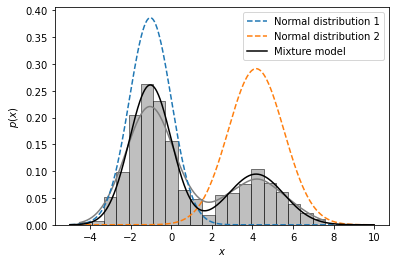

In [29]:
plot_mixture(x, *final_dist_params)
plt.savefig('figures/em_final_distribution.pdf')